Question-2

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import datasets,layers,models,optimizers,losses
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
data= pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


In [4]:
data=data.drop('Car Name',axis=1)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
data=data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [6]:
one_hot=pd.get_dummies(data,columns=['Origin']).astype(int)
one_hot.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18,8,307,130,3504,12,70,1,0,0
1,15,8,350,165,3693,11,70,1,0,0
2,18,8,318,150,3436,11,70,1,0,0
3,16,8,304,150,3433,12,70,1,0,0
4,17,8,302,140,3449,10,70,1,0,0


In [7]:
mpg=one_hot['MPG']#target variable
remaining_data=one_hot.drop('MPG',axis=1)

In [8]:
remaining_train,remaining_test,mpg_train,mpg_test=train_test_split(remaining_data,mpg,test_size=0.2,random_state=0)

In [9]:
scaler = StandardScaler()
remaining_train = scaler.fit_transform(remaining_train)
remaining_test = scaler.transform(remaining_test)

In [80]:
model=models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(remaining_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1)
])

In [86]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss=losses.MeanSquaredError(),metrics=['mse'])

In [87]:

train=model.fit(remaining_train,mpg_train,epochs=100,batch_size=64,verbose=2)

Epoch 1/100
5/5 - 4s - loss: 108.4487 - mse: 108.4487 - 4s/epoch - 899ms/step
Epoch 2/100
5/5 - 0s - loss: 103.9559 - mse: 103.9559 - 28ms/epoch - 6ms/step
Epoch 3/100
5/5 - 0s - loss: 96.4395 - mse: 96.4395 - 21ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 99.8183 - mse: 99.8183 - 18ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 87.3221 - mse: 87.3221 - 17ms/epoch - 3ms/step
Epoch 6/100
5/5 - 0s - loss: 86.6767 - mse: 86.6767 - 20ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 80.5165 - mse: 80.5165 - 18ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 75.4228 - mse: 75.4228 - 20ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 76.8112 - mse: 76.8112 - 18ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 74.5363 - mse: 74.5363 - 18ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 70.3789 - mse: 70.3789 - 18ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 70.6670 - mse: 70.6670 - 18ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 66.6586 - mse: 66.6586 - 19ms/epoch - 4ms/step
Epoc

In [88]:
train.history['loss']

[108.44874572753906,
 103.95587158203125,
 96.43954467773438,
 99.81831359863281,
 87.32209777832031,
 86.67674255371094,
 80.51646423339844,
 75.42278289794922,
 76.81121826171875,
 74.53632354736328,
 70.37889099121094,
 70.66703033447266,
 66.6585922241211,
 63.59225082397461,
 64.56318664550781,
 57.325984954833984,
 50.476078033447266,
 53.35905838012695,
 45.430419921875,
 50.139427185058594,
 41.791786193847656,
 47.05382537841797,
 39.77030563354492,
 41.23213577270508,
 40.11298751831055,
 45.26640701293945,
 40.88740539550781,
 38.94793701171875,
 33.41428756713867,
 33.79945755004883,
 32.565147399902344,
 31.03328514099121,
 32.40859603881836,
 27.307567596435547,
 32.96666717529297,
 29.50825309753418,
 27.027196884155273,
 28.144638061523438,
 28.524232864379883,
 29.22078514099121,
 26.2766170501709,
 28.33989143371582,
 26.60736656188965,
 24.6904239654541,
 23.522598266601562,
 23.935251235961914,
 23.966432571411133,
 22.851924896240234,
 23.459590911865234,
 19.24273

Text(0, 0.5, 'LOSS')

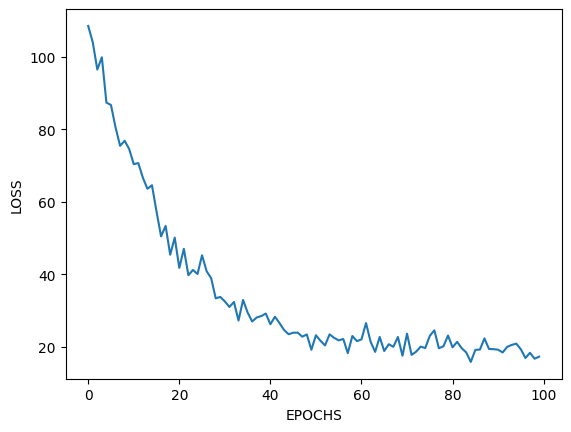

In [89]:
epoch=range(len(train.history['loss']))
plt.plot(epoch,train.history['loss'])
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')

In [90]:
model.evaluate(remaining_test,mpg_test,batch_size=32)

3/3 [==============================] - 0s 5ms/step - loss: 6.5376 - mse: 6.5376


[6.537595272064209, 6.537595272064209]